# GIS Exercise 4: Creating a heatmap of US Southern County Homicides in 1960-1990

## For WR514: GIS and Data Analysis in Natural Resources

Completed by A.J. Brown on 13 April 2023

In [9]:
# set graph size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [1]:
# Import data
import geopandas
from geopandas import read_file

In [2]:
import mapclassify
mapclassify.__version__

'2.4.3'

In [3]:
import libpysal
libpysal.__version__

'4.5.1'

In [4]:
libpysal.examples.available()

Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",True
2,Atlanta,"Atlanta, GA region homicide counts and rates",True
3,Baltimore,Baltimore house sales prices and hedonics,True
4,Bostonhsg,Boston housing and neighborhood data,True
...,...,...,...
93,taz,Traffic Analysis Zones in So. California,True
94,tokyo,Tokyo Mortality data,True
95,us_income,Per-capita income for the lower 48 US states 1...,True
96,virginia,Virginia counties shapefile,True


In [5]:
_ = libpysal.examples.load_example('South')
pth = libpysal.examples.get_path('south.shp')

In [6]:
df = read_file(pth)

In [ ]:
df.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Hancock,West Virginia,54,029,54029,54,29,54029,1,1.682864,...,2.557262,0.223645,0.295377,0.332251,0.363934,9.981297,7.8,9.785797,12.604552,"POLYGON ((-80.62805 40.39816, -80.60204 40.480..."
1,Brooke,West Virginia,54,009,54009,54,9,54009,1,4.607233,...,0.748370,0.220407,0.318453,0.314165,0.350569,10.929337,8.0,10.214990,11.242293,"POLYGON ((-80.52625 40.16245, -80.58760 40.175..."
2,Ohio,West Virginia,54,069,54069,54,69,54069,1,0.974132,...,3.310334,0.272398,0.358454,0.376963,0.390534,15.621643,12.9,14.716681,17.574021,"POLYGON ((-80.52517 40.02275, -80.73843 40.035..."
3,Marshall,West Virginia,54,051,54051,54,51,54051,1,0.876248,...,0.546097,0.227647,0.319580,0.320953,0.377346,11.962834,8.8,8.803253,13.564159,"POLYGON ((-80.52447 39.72113, -80.83248 39.718..."
4,New Castle,Delaware,10,003,10003,10,3,10003,1,4.228385,...,16.480294,0.256106,0.329678,0.365830,0.332703,12.035714,10.7,15.169480,16.380903,"POLYGON ((-75.77270 39.38301, -75.79144 39.723..."


## Plot counties colored by State

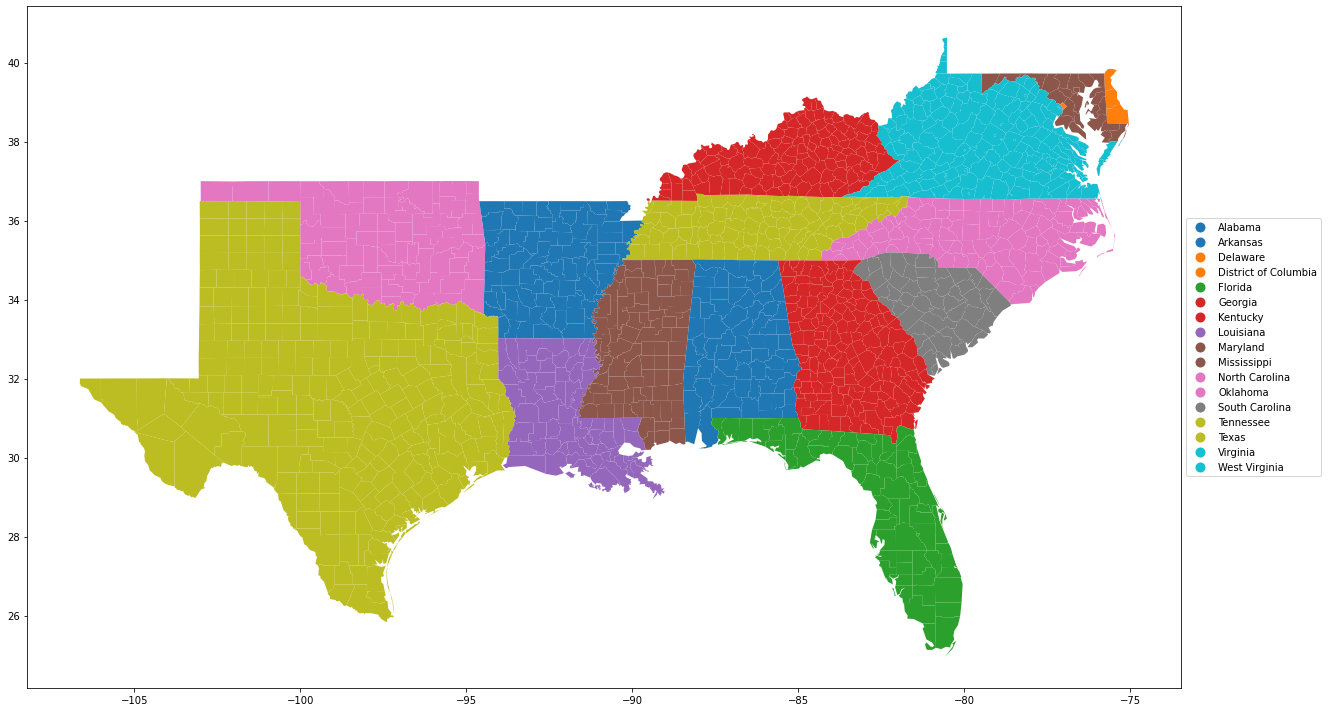

In [11]:
ax = df.plot(column='STATE_NAME', categorical=True, legend=True, \
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"}) # fmt is ignored for categorical data
plt.tight_layout()
plt.savefig('counties.jpg')

## Create heatmap colorized by homicide count

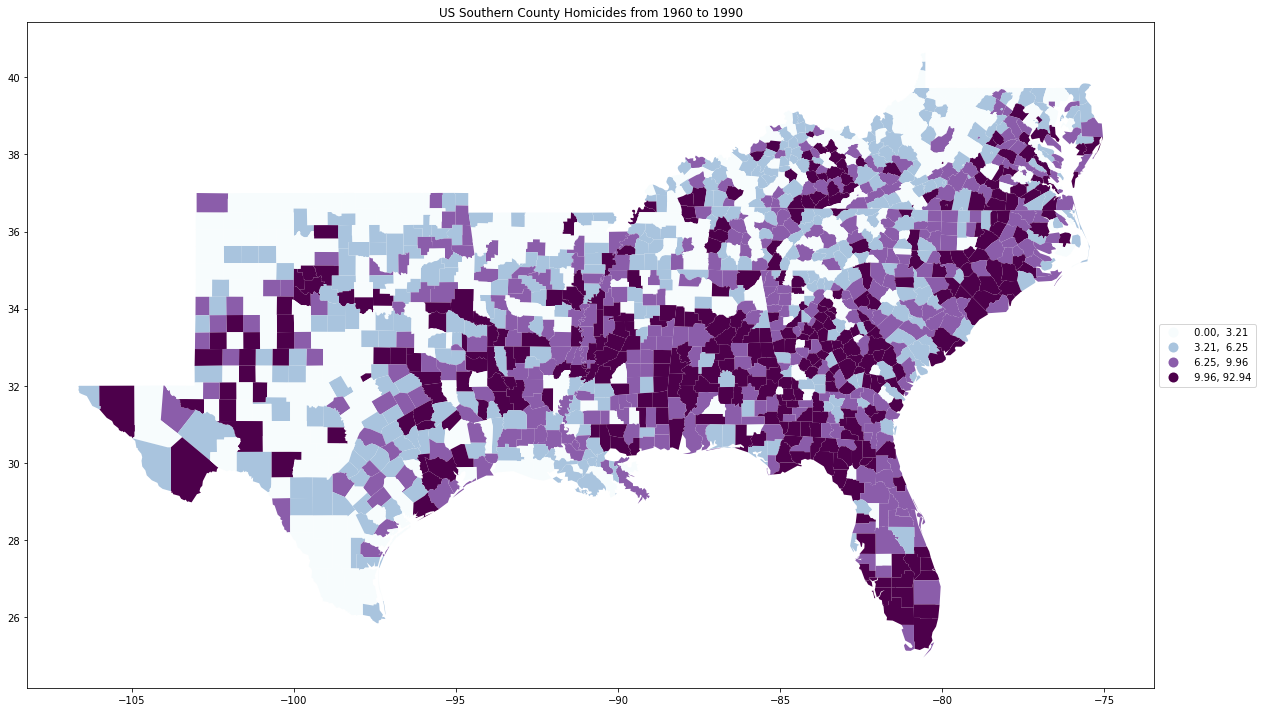

In [19]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set(title='US Southern County Homicides from 1960 to 1990')
plt.tight_layout()
plt.savefig('homicides.jpg')